In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import datetime as dt


In [3]:
df=pd.read_csv('Steel_industry_data.csv')
df['date']=pd.to_datetime(df['date'],format= "%d/%m/%Y %H:%M")
df.head(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
print('Number of rows and columns:',df.shape)
print( df.dtypes)

Number of rows and columns: (35040, 11)
date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
dtype: object


In [5]:
df['Usage_kWh'].describe()

count    35040.000000
mean        27.386892
std         33.444380
min          0.000000
25%          3.200000
50%          4.570000
75%         51.237500
max        157.180000
Name: Usage_kWh, dtype: float64

Text(0.5, 1.0, 'Distribution of Usage of Energy in kwh')

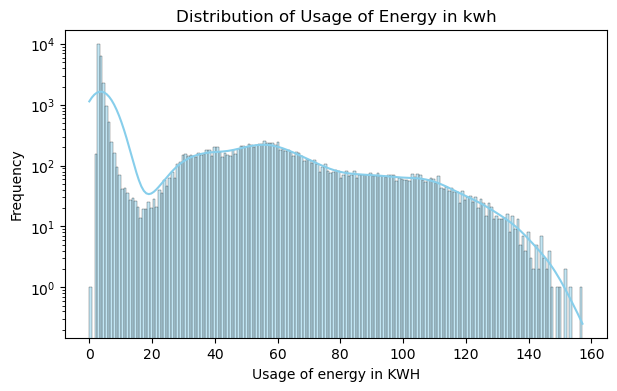

In [6]:
plt.figure(figsize=(7,4))
sns.histplot(df['Usage_kWh'], bins = int(np.sqrt(df.shape[0])) , kde=True, color='skyblue', edgecolor='black')
plt.semilogy()
plt.xlabel('Usage of energy in KWH')
plt.ylabel('Frequency')
plt.title('Distribution of Usage of Energy in kwh')


Text(0.5, 1.0, 'Barplot of Load type and day of week')

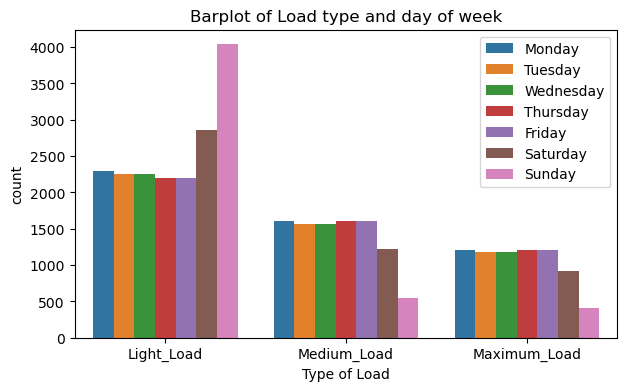

In [7]:
plt.figure(figsize=(7,4))
sns.countplot(x=df['Load_Type'],hue=df['Day_of_week'])
plt.legend()
plt.xlabel('Type of Load')
plt.title('Barplot of Load type and day of week')

In [8]:
df_hasco2=df[df['CO2(tCO2)'] != 0]
df_noco2=df[df['CO2(tCO2)'] == 0]

Text(0.5, 1.0, 'Boxplot comparing energy usage and CO2 production')

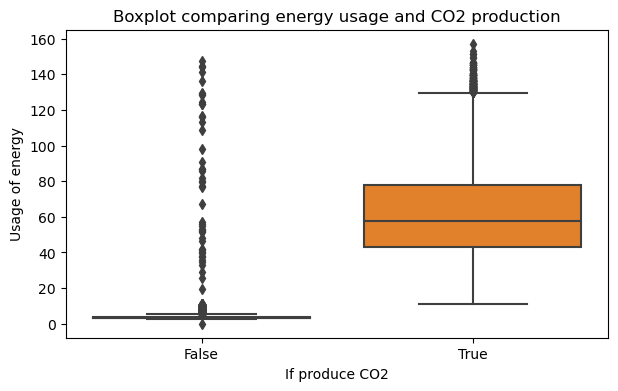

In [9]:
plt.rc("figure", figsize=(7, 4))
plt.figure(figsize=(7,4))
df['if_CO2']=df['CO2(tCO2)']>0
sns.boxplot(y=df['Usage_kWh'],x=df['if_CO2'])
plt.xlabel('If produce CO2')
plt.ylabel('Usage of energy')
plt.title('Boxplot comparing energy usage and CO2 production')

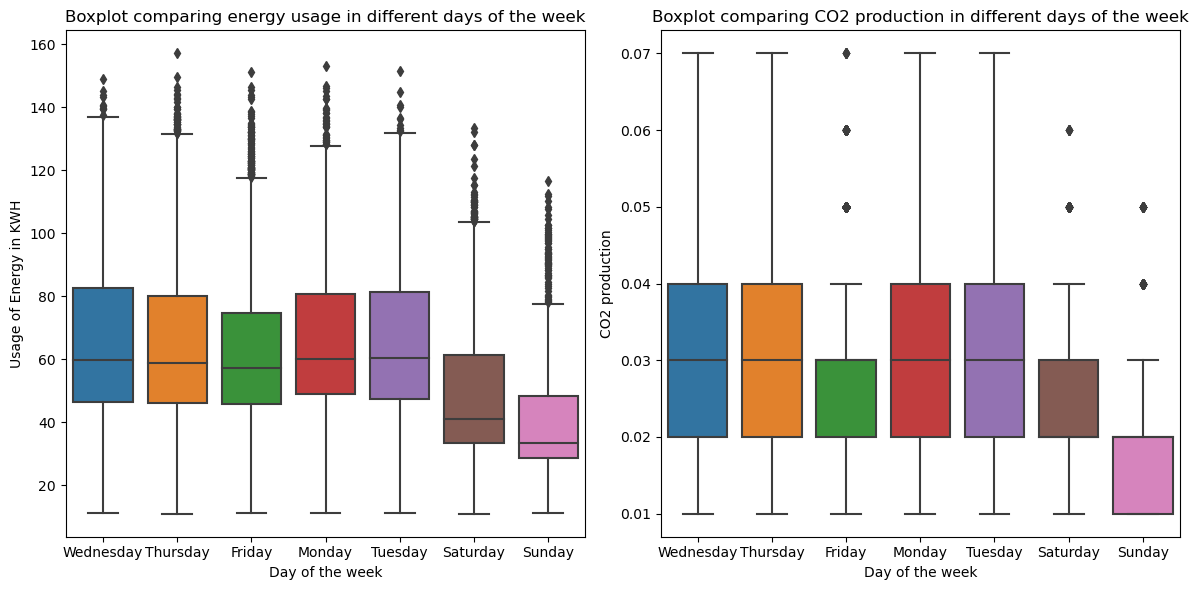

In [10]:
plt.rc("figure", figsize=(12, 6))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=df_hasco2['Usage_kWh'], x=df_hasco2['Day_of_week'], ax=axes[0])
axes[0].set_title('Boxplot comparing energy usage in different days of the week')
axes[0].set_xlabel('Day of the week')
axes[0].set_ylabel('Usage of Energy in KWH')
sns.boxplot(y=df_hasco2['CO2(tCO2)'], x=df_hasco2['Day_of_week'], ax=axes[1])
axes[1].set_title('Boxplot comparing CO2 production in different days of the week')
axes[1].set_xlabel('Day of the week')
axes[1].set_ylabel('CO2 production')

plt.tight_layout()
plt.show()

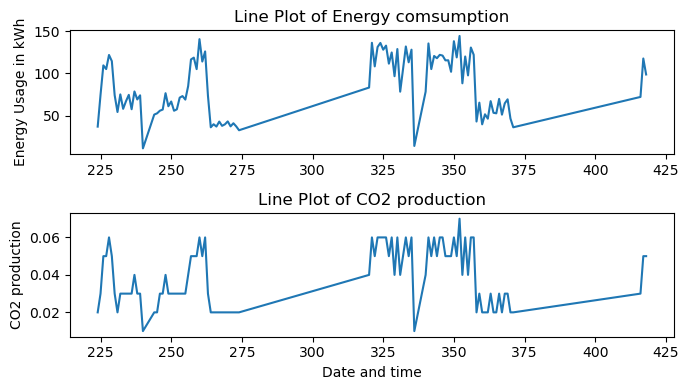

In [11]:
df_sample=df_hasco2.iloc[0:100]
plt.rc("figure", figsize=(7, 4))
fig, axes = plt.subplots(2, 1, figsize=(7, 4))

# First subplot (Usage_kWh)
sns.lineplot(data=df_sample, x=df_sample.index, y='Usage_kWh', ax=axes[0])
axes[0].set_title('Line Plot of Energy comsumption')
axes[1].set_xlabel('Date and time')
axes[0].set_ylabel('Energy Usage in kWh')

# Second subplot (CO2(tCO2))
sns.lineplot(data=df_sample, x=df_sample.index, y='CO2(tCO2)', ax=axes[1])
axes[1].set_title('Line Plot of CO2 production')
axes[1].set_xlabel('Date and time')
axes[1].set_ylabel('CO2 production')

plt.tight_layout()
plt.show()

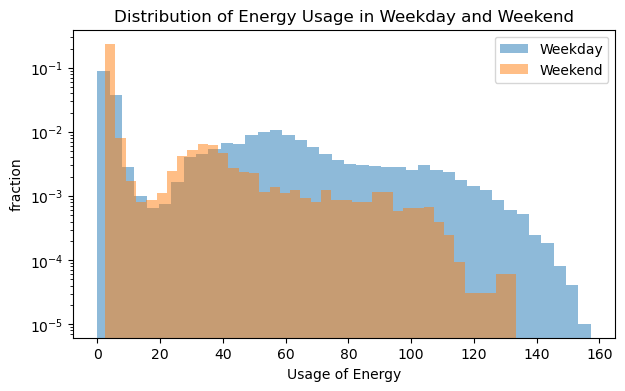

In [12]:

categories = df['WeekStatus'].unique()

plt.rc("figure", figsize=(7,4))
plt.figure(figsize=(7,4))
for c in categories:
    plt.hist(df[df['WeekStatus']==c]['Usage_kWh'],alpha=0.5,label=c,bins=40, density=True)
plt.legend()
plt.semilogy()
plt.ylabel('fraction')
plt.xlabel('Usage of Energy')
plt.title('Distribution of Energy Usage in Weekday and Weekend')
plt.show()

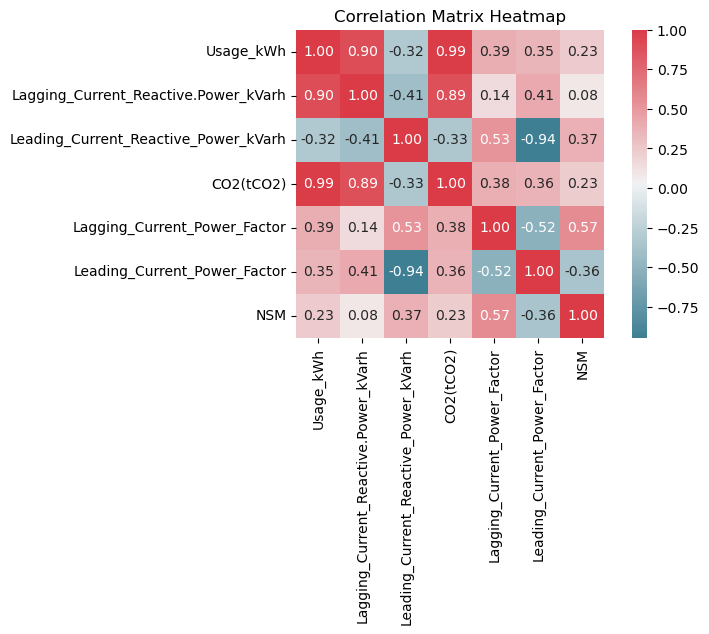

In [13]:
df_num=df.select_dtypes(include=['float64', 'int64'])

f, ax = plt.subplots(figsize=(7, 4))
corr = df_num.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)
ax.set_title('Correlation Matrix Heatmap')
plt.show()

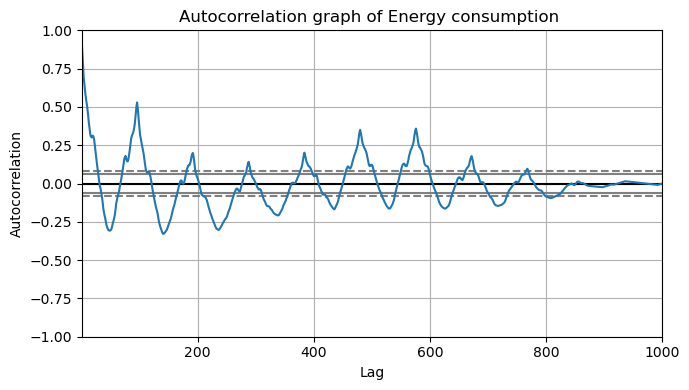

In [14]:
df_visualization=df.iloc[:1000]
plt.rc("figure", figsize=(7,4))
plt.figure(figsize=(7,4))
pd.plotting.autocorrelation_plot(df_visualization['Usage_kWh'])
plt.title("Autocorrelation graph of Energy consumption ")
plt.tight_layout()
plt.show()

In [15]:
df=df.drop(columns='if_CO2')

Data spliting

In [16]:
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

In [17]:
train_set, test_set= np.split(df, [int(.8 *len(df))])

In [18]:
X_other = train_set.loc[:, df.columns != 'Usage_kWh']
y_other = train_set['Usage_kWh']
X_test = test_set.loc[:, test_set.columns != 'Usage_kWh']
y_test = test_set[['Usage_kWh']]

In [19]:
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)
for i, (train_index, val_index) in enumerate(tscv.split(X_other,y_other)):
    y_train = y_other.iloc[train_index]
    X_train = X_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   iteration', i,':')
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) 

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
   iteration 0 :
   training set: (4672, 9) (4672,)
   validation set: (4672, 9) (4672,)
   iteration 1 :
   training set: (9344, 9) (9344,)
   validation set: (4672, 9) (4672,)
   iteration 2 :
   training set: (14016, 9) (14016,)
   validation set: (4672, 9) (4672,)
   iteration 3 :
   training set: (18688, 9) (18688,)
   validation set: (4672, 9) (4672,)
   iteration 4 :
   training set: (23360, 9) (23360,)
   validation set: (4672, 9) (4672,)


# Data preprocess

- To avoid data leakage, let's perform data preprocessing on train set and test set respectively.

1. Check missing value

In [20]:
df.isnull().sum()


Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

### Feature engineering for train set:

2. Transformation

In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

ordinal_f_week = ['Day_of_week']
ordinal_Load =['Load_Type']
onehot_ws = ['WeekStatus']
continuous_cols = ['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']
cats_dofw = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']]
cats_load = [['Light_Load', 'Medium_Load', 'Maximum_Load']]

encoder_dofw = OrdinalEncoder(categories = cats_dofw )
encoder_load = OrdinalEncoder(categories = cats_load )
standardscaler = StandardScaler()

preprocessor = ColumnTransformer(
        transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ws),
        ('ordinal1', encoder_dofw, ordinal_f_week),
        ('ordinal2', encoder_load, ordinal_Load),('standardscaler', standardscaler, continuous_cols)])


In [67]:
X_other1=preprocessor.fit_transform(X_other)
pd.DataFrame(X_other1)


,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,-0.594279,-0.516007,-0.721996,-0.497575,0.508922,-1.714102
1,1.0,0.0,0.0,0.0,-0.625216,-0.516007,-0.721996,-0.347483,0.508922,-1.678015
2,1.0,0.0,0.0,0.0,-0.533620,-0.516007,-0.721996,-0.679645,0.508922,-1.641929
3,1.0,0.0,0.0,0.0,-0.605198,-0.516007,-0.721996,-0.498606,0.508922,-1.605843
4,1.0,0.0,0.0,0.0,-0.588213,-0.516007,-0.721996,-0.611562,0.508922,-1.569756
...,...,...,...,...,...,...,...,...,...,...
28027,1.0,0.0,4.0,1.0,2.475690,-0.516007,1.723804,0.165718,0.508922,1.569756
28028,1.0,0.0,4.0,1.0,1.890328,-0.516007,0.500904,-0.138076,0.508922,1.605843
28029,1.0,0.0,4.0,0.0,1.765976,-0.516007,0.500904,-0.473333,0.508922,1.641929
28030,1.0,0.0,4.0,0.0,2.157229,-0.516007,1.112354,0.164171,0.508922,1.678015


### Feature engineering for test set:

In [22]:
# X_test['Day_of_week']=encoder_dofw.fit_transform(X_test[ordinal_f_week])
# X_test['Load_Type']=encoder_load.fit_transform(X_test[ordinal_Load])
# X_test['WeekStatus']=encoder_ws.fit_transform(X_test['WeekStatus'])

In [23]:
# def standardize_continuous_features(train_data, test_data):
#     continuous_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
#     scaler = StandardScaler()
#     scaler.fit(train_data[continuous_cols])
#     standardized_test_data = test_data.copy()  # Create a copy of the test data
#     standardized_test_data[continuous_cols] = scaler.transform(test_data[continuous_cols])
#     return standardized_test_data

# X_test=standardize_continuous_features(X_train,X_test)

In [24]:
# from sklearn.feature_selection import SelectKBest, f_regression
# feature_selector = SelectKBest(f_regression, k = "all")
# fit = feature_selector.fit(X_train,y_train)

# p_values = pd.DataFrame(fit.pvalues_)
# scores = pd.DataFrame(fit.scores_)
# input_variable_names = pd.DataFrame(X_train.columns)
# summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
# summary_stats.columns = ["input_variable", "p_value", "f_score"]
# summary_stats.sort_values(by = "p_value", inplace = True)
# summary_stats 

In [266]:
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer,mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


# function for the ML pipeline as outlined above 
def MLpipe_TSCV_RMSE_R2(df, preprocessor, ML_algo, param_grid):
    random_splits=[0.8,0.7,0.6]
    r2_scores=[]
    rmse_scores=[]
    best_models=[]
    for i in random_splits:
        print(f'Random split {i}:')
        train_set, test_set= np.split(df, [int(i *len(df))])
        X_other = train_set.loc[:, df.columns != 'Usage_kWh']
        y_other = train_set['Usage_kWh']
        X_test = test_set.loc[:, test_set.columns != 'Usage_kWh']
        y_test = test_set[['Usage_kWh']]
        # print('Test Shape:', X_test.shape)


        # Generate model prediction baseline
        baseline_prediction = np.mean(y_other) 
        baseline_predictions = np.full_like(y_test, fill_value=baseline_prediction)

        # Evaluate the performance of the baseline model
        rmse_baseline = mean_squared_error(y_test, baseline_predictions, squared=False)
        r2_baseline = r2_score(y_test, baseline_predictions)

        print(f"Test RMSE (Baseline): {rmse_baseline:.4f}")
        print(f"Test R-squared (Baseline): {r2_baseline:.4f}")
    
        tscv = TimeSeriesSplit(n_splits=5)
        print(tscv)
    #   for i, (train_index, val_index) in enumerate(tscv.split(X_other,y_other)):
    #       y_train = y_other.iloc[train_index]
    #       X_train = X_other.iloc[train_index]
    #       X_val = X_other.iloc[val_index]
    #       y_val = y_other.iloc[val_index]
    #       print('   iteration', i,':')
    #       print('   training set:',X_train.shape, y_train.shape) 
    #       print('   validation set:',X_val.shape, y_val.shape) 
    #       print("Train index:", train_index[:10], "Val index:", val_index[:10])


    #   Create the pipeline of preprocessor and ML model fit
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model',ML_algo)])

        RMSE=make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False), greater_is_better=False)

        grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=RMSE, cv=tscv, n_jobs=-1)
        grid_search.fit(X_other, y_other)

        results = pd.DataFrame(grid_search.cv_results_)
        #print(results)

        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Cross-validation RMSE: {-grid_search.best_score_}")


        
        rmse_score = mean_squared_error(y_test, grid_search.predict(X_test), squared=False)
        r2 = r2_score(y_test, grid_search.predict(X_test))
        rmse_scores.append(rmse_score)
        r2_scores.append(r2)

        print(f"Test RMSE ('Model'): {rmse_score}")
        print(f"Test R-squared ('Model'): {r2:.4f}")
        best_model = grid_search.best_estimator_['model']
        best_models.append(best_model)
    
    print(f"Mean Test RMSE: {np.mean(rmse_scores)}")
    print(f"Standard Deviation of Test RMSE: {np.std(rmse_scores)}")
    print(f"Mean Test R2: {np.mean(r2_scores)}")
    print(f"Standard Deviation of Test R2: {np.std(r2_scores)}")

    
    return rmse_scores, r2_scores, best_models

In [267]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
param_grid = {'model__fit_intercept': [True,False]}

LR_rmse_scores, LR_r2_scores, LR_best_models = MLpipe_TSCV_RMSE_R2(df, preprocessor, LR, param_grid)

Random split 0.8:
Test RMSE (Baseline): 31.4874
Test R-squared (Baseline): -0.0074
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__fit_intercept': False}
Cross-validation RMSE: 4.504858995596662
Test RMSE ('Model'): 3.5242785073844964
Test R-squared ('Model'): 0.9874
Random split 0.7:
Test RMSE (Baseline): 31.2131
Test R-squared (Baseline): -0.0199
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__fit_intercept': False}
Cross-validation RMSE: 4.705955834331032
Test RMSE ('Model'): 3.5839279411865372
Test R-squared ('Model'): 0.9866
Random split 0.6:
Test RMSE (Baseline): 31.6473
Test R-squared (Baseline): -0.0181
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__fit_intercept': True}
Cross-validation RMSE: 4.803344997624597
Test RMSE ('Model'): 3.7697238893393217
Test R-squared ('Model'): 0.9856
Mean Test RMSE: 3.6259767793034516
Standard Dev

In [269]:
from sklearn.svm import SVR
param_grid = {
    'model__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
    'model__C': [1e-1, 1e0, 1e1],
    'model__kernel': ['rbf', 'linear', 'sigmoid']
}

svr=SVR()

SVR_rmse_scores, SVR_r2_scores, SVR_best_models = MLpipe_TSCV_RMSE_R2(df, preprocessor, svr, param_grid)

Random split 0.8:
Test RMSE (Baseline): 31.4874
Test R-squared (Baseline): -0.0074
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__C': 10.0, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
Cross-validation RMSE: 1.8037294239627921
Test RMSE ('Model'): 1.5752399032099549
Test R-squared ('Model'): 0.9975
Random split 0.7:
Test RMSE (Baseline): 31.2131
Test R-squared (Baseline): -0.0199
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__C': 10.0, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
Cross-validation RMSE: 1.9077562433579949
Test RMSE ('Model'): 1.4575657674505544
Test R-squared ('Model'): 0.9978
Random split 0.6:
Test RMSE (Baseline): 31.6473
Test R-squared (Baseline): -0.0181
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__C': 10.0, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
Cross-validation RMSE: 1.9864204601303939
Test RMSE ('Model'):

In [268]:
from sklearn.linear_model import Lasso

Lasso = Lasso()
param_grid = {'model__alpha': [0.01, 0.1, 1,10,100]}

Lasso_rmse_scores, Lasso_r2_scores, Lasso_best_models = MLpipe_TSCV_RMSE_R2(df, preprocessor, Lasso, param_grid)


Random split 0.8:
Test RMSE (Baseline): 31.4874
Test R-squared (Baseline): -0.0074
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__alpha': 1}
Cross-validation RMSE: 4.084505825393046
Test RMSE ('Model'): 3.6719764810342745
Test R-squared ('Model'): 0.9863
Random split 0.7:
Test RMSE (Baseline): 31.2131
Test R-squared (Baseline): -0.0199
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__alpha': 1}
Cross-validation RMSE: 4.19524325947898
Test RMSE ('Model'): 3.6300773268203486
Test R-squared ('Model'): 0.9862
Random split 0.6:
Test RMSE (Baseline): 31.6473
Test R-squared (Baseline): -0.0181
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__alpha': 1}
Cross-validation RMSE: 4.286480691937563
Test RMSE ('Model'): 3.705854496619028
Test R-squared ('Model'): 0.9860
Mean Test RMSE: 3.669302768157884
Standard Deviation of Test RMSE: 0.030993616773818

In [246]:
# prepare data set to train the best models 
train_set, test_set= np.split(df, [int(.8 *len(df))])
X_other = train_set.loc[:, df.columns != 'Usage_kWh']
y_other = train_set['Usage_kWh']
X_test = test_set.loc[:, test_set.columns != 'Usage_kWh']
y_test = test_set['Usage_kWh']

X_prep = preprocessor.fit_transform(X_other)
feature_names = preprocessor.get_feature_names_out()

df_other = pd.DataFrame(data=X_prep,columns=feature_names)
print(f'preprocessed train size: {df_other.shape}')

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(f'preprocessed test size: {df_test.shape}')

preprocessed train size: (28032, 10)
preprocessed test size: (7008, 10)


In [241]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=1)
param_grid = {'model__max_depth': [10, 30, 60],
        'model__min_samples_leaf': [1, 2, 4],
        'model__n_estimators': [10, 30]}

RFR_rmse_scores, RFR_r2_scores, RFR_best_models = MLpipe_TSCV_RMSE_R2(df, preprocessor, RFR, param_grid)

results_df = {'Test_size': [0.8,0.7,0.6],'RMSE': RFR_rmse_scores, 'R2': RFR_r2_scores}
results_df = pd.DataFrame(results_df)

results_df



Random split 0.8:
Test RMSE (Baseline): 31.4874
Test R-squared (Baseline): -0.0074
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__max_depth': 30, 'model__min_samples_leaf': 2, 'model__n_estimators': 30}
Cross-validation RMSE: 1.4722705678780608
Test RMSE ('Model'): 0.8556580818948032
Test R-squared ('Model'): 0.9993
Random split 0.7:
Test RMSE (Baseline): 31.2131
Test R-squared (Baseline): -0.0199
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__max_depth': 30, 'model__min_samples_leaf': 2, 'model__n_estimators': 30}
Cross-validation RMSE: 1.5543689501594549
Test RMSE ('Model'): 0.8746524974148919
Test R-squared ('Model'): 0.9992
Random split 0.6:
Test RMSE (Baseline): 31.6473
Test R-squared (Baseline): -0.0181
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__n_estimators': 30}
Cross-va

,Test_size,RMSE,R2
0,0.8,0.855658,0.999256
1,0.7,0.874652,0.999199
2,0.6,1.982084,0.996006


In [247]:
RFR_best_rmse_scores=[]
RFR_best_r2_scores=[]
RFR_best_best_models=[]
print('Model performance on test set under 10 different randomstates')
for random_state in range(10):
    print(f"Search {random_state}:")
    RFR_best = RandomForestRegressor(max_depth=30, min_samples_leaf= 2, n_estimators=30,random_state=random_state)
    RFR_best.fit(df_other,y_other)
    RFR_best_rmse_score = mean_squared_error(y_test, RFR_best.predict(df_test), squared=False)
    RFR_best_r2 = r2_score(y_test, RFR_best.predict(df_test))
    RFR_best_rmse_scores.append(RFR_best_rmse_score)
    RFR_best_r2_scores.append(RFR_best_r2)

    print(f"Test RMSE ('Model'): {RFR_best_rmse_score}")
    print(f"Test R-squared ('Model'): {RFR_best_r2:.4f}")

print(f"Mean Test RMSE: {np.mean(RFR_best_rmse_scores)}")
print(f"Standard Deviation of Test RMSE: {np.std(RFR_best_rmse_scores)}")
print(f"Mean Test R2: {np.mean(RFR_best_r2_scores)}")
print(f"Standard Deviation of Test R2: {np.std(RFR_best_r2_scores)}")

Model performance on test set under 10 different randomstates
Search 0:
Test RMSE ('Model'): 0.8756296688834906
Test R-squared ('Model'): 0.9992
Search 1:
Test RMSE ('Model'): 0.8556580818948032
Test R-squared ('Model'): 0.9993
Search 2:
Test RMSE ('Model'): 0.9127171180082024
Test R-squared ('Model'): 0.9992
Search 3:
Test RMSE ('Model'): 0.8448806858449902
Test R-squared ('Model'): 0.9993
Search 4:
Test RMSE ('Model'): 0.9278955804249568
Test R-squared ('Model'): 0.9991
Search 5:
Test RMSE ('Model'): 0.8351762612798853
Test R-squared ('Model'): 0.9993
Search 6:
Test RMSE ('Model'): 0.8046010874689108
Test R-squared ('Model'): 0.9993
Search 7:
Test RMSE ('Model'): 0.9799366122805383
Test R-squared ('Model'): 0.9990
Search 8:
Test RMSE ('Model'): 0.8848724720642638
Test R-squared ('Model'): 0.9992
Search 9:
Test RMSE ('Model'): 0.8821172724946184
Test R-squared ('Model'): 0.9992
Mean Test RMSE: 0.8803484840644661
Standard Deviation of Test RMSE: 0.047872634026199845
Mean Test R2: 0.999

In [248]:
results_df = {'Random State': range(10), 'RMSE': RFR_best_rmse_scores, 'R2': RFR_best_r2_scores}
results_df = pd.DataFrame(results_df)
results_df.set_index('Random State', inplace=True)
results_df

,RMSE,R2
Random State,,
0,0.875630,0.999221
1,0.855658,0.999256
2,0.912717,0.999154
3,0.844881,0.999275
4,0.927896,0.999125
5,0.835176,0.999291
6,0.804601,0.999342
7,0.979937,0.999024
8,0.884872,0.999204


In [244]:
import xgboost
XGB = xgboost.XGBRegressor(random_state=100)
param_grid = {'model__eta': [0.01, 0.1, 0.2], 'model__max_depth': [10, 30, 100],
    'model__subsample': [0.8, 0.9, 1.0]}

XGB_rmse_scores, XGB_r2_scores, XGB_best_models = MLpipe_TSCV_RMSE_R2(df, preprocessor, XGB, param_grid)

results_df = {'Test_size': [0.8,0.7,0.6],'RMSE': XGB_rmse_scores, 'R2': XGB_r2_scores}
results_df = pd.DataFrame(results_df)
results_df

Random split 0.8:
Test RMSE (Baseline): 31.4874
Test R-squared (Baseline): -0.0074
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__eta': 0.1, 'model__max_depth': 30, 'model__subsample': 0.8}
Cross-validation RMSE: 1.1638845659916286
Test RMSE ('Model'): 0.7712235681260136
Test R-squared ('Model'): 0.9994
Random split 0.7:
Test RMSE (Baseline): 31.2131
Test R-squared (Baseline): -0.0199
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__eta': 0.1, 'model__max_depth': 30, 'model__subsample': 1.0}
Cross-validation RMSE: 1.2361575294349212
Test RMSE ('Model'): 0.9200908362991915
Test R-squared ('Model'): 0.9991
Random split 0.6:
Test RMSE (Baseline): 31.6473
Test R-squared (Baseline): -0.0181
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Best parameters: {'model__eta': 0.1, 'model__max_depth': 30, 'model__subsample': 0.8}
Cross-validation RMSE: 1.3540100825196437
Test 

,Test_size,RMSE,R2
0,0.8,0.771224,0.999396
1,0.7,0.920091,0.999114
2,0.6,1.434575,0.997908


In [251]:
XGB_best_rmse_scores=[]
XGB_best_r2_scores=[]
print('Model performance on test set under 10 different randomstates')
for random_state in range(10):
    print(f"Search {random_state}:")
    XGB_best = xgboost.XGBRegressor(eta = 0.1, max_depth=100, subsample=0.8,random_state=random_state)
    XGB_best.fit(df_other,y_other)
    XGB_best_rmse_score = mean_squared_error(y_test, XGB_best.predict(df_test), squared=False)
    XGB_best_r2 = r2_score(y_test, XGB_best.predict(df_test))
    XGB_best_rmse_scores.append(XGB_best_rmse_score)
    XGB_best_r2_scores.append(XGB_best_r2)

    print(f"Test RMSE ('Model'): {XGB_best_rmse_score}")
    print(f"Test R-squared ('Model'): {XGB_best_r2:.4f}")

print(f"Mean Test RMSE: {np.mean(XGB_best_rmse_scores)}")
print(f"Standard Deviation of Test RMSE: {np.std(XGB_best_rmse_scores)}")
print(f"Mean Test R2: {np.mean(XGB_best_r2_scores)}")
print(f"Standard Deviation of Test R2: {np.std(XGB_best_r2_scores)}")

Model performance on test set under 10 different randomstates
Search 0:
Test RMSE ('Model'): 1.0615534785164444
Test R-squared ('Model'): 0.9989
Search 1:
Test RMSE ('Model'): 0.8071618009332275
Test R-squared ('Model'): 0.9993
Search 2:
Test RMSE ('Model'): 0.8629558580479345
Test R-squared ('Model'): 0.9992
Search 3:
Test RMSE ('Model'): 0.716751311587489
Test R-squared ('Model'): 0.9995
Search 4:
Test RMSE ('Model'): 0.8260931660481893
Test R-squared ('Model'): 0.9993
Search 5:
Test RMSE ('Model'): 0.7475716131878885
Test R-squared ('Model'): 0.9994
Search 6:
Test RMSE ('Model'): 0.8121675957857534
Test R-squared ('Model'): 0.9993
Search 7:
Test RMSE ('Model'): 0.7631316026988668
Test R-squared ('Model'): 0.9994
Search 8:
Test RMSE ('Model'): 0.7781529092540286
Test R-squared ('Model'): 0.9994
Search 9:
Test RMSE ('Model'): 0.8734745908179875
Test R-squared ('Model'): 0.9992
Mean Test RMSE: 0.824901392687781
Standard Deviation of Test RMSE: 0.09163363637798924
Mean Test R2: 0.999300

In [252]:
results_df = {'Random State': range(10), 'RMSE': XGB_best_rmse_scores, 'R2': XGB_best_r2_scores}
results_df = pd.DataFrame(results_df)
results_df.set_index('Random State', inplace=True)
results_df

,RMSE,R2
Random State,,
0,1.061553,0.998855
1,0.807162,0.999338
2,0.862956,0.999243
3,0.716751,0.999478
4,0.826093,0.999307
5,0.747572,0.999432
6,0.812168,0.999330
7,0.763132,0.999408
8,0.778153,0.999385


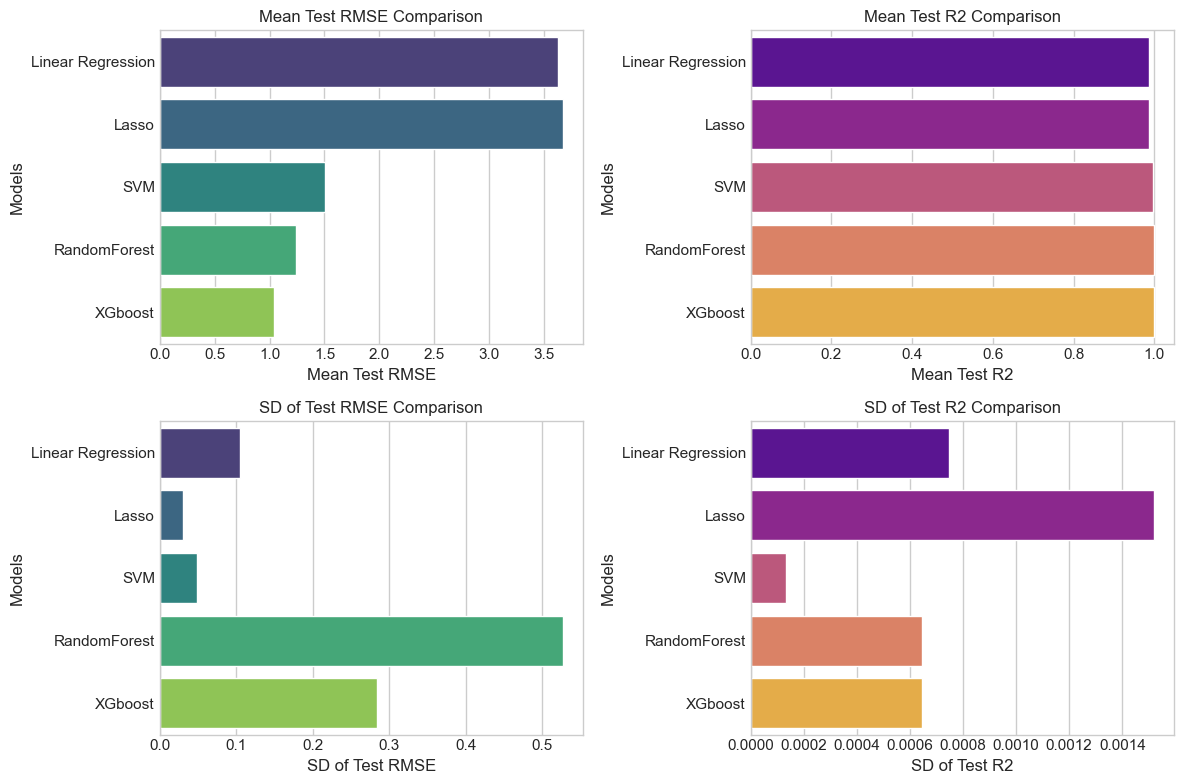

In [283]:
# Compare model performance
model_compare=pd.DataFrame({'Models':['Linear Regression','Lasso','SVM','RandomForest','XGboost'],
    'Mean Test RMSE': [3.6259767793034516,3.669302768157884, 1.508477324539322,   1.2374648924437668,1.041963003389223],
'SD of Test RMSE':[0.10452093082559867,0.03099361677381878,0.049330461992376916,0.526582388578632,0.2841927381316196],
'Mean Test R2': [0.9864959928846039,0.9861816327823743,0.9976633284451438,0.9981538492878613,0.9988057927840822],
'SD of Test R2': [0.0007466609785247212,0.001518731867183813,0.00013155775922209155,0.0006452373095798274,0.0006452373095798274]})


# Plotting
plt.figure(figsize=(12, 8))

# Mean Test RMSE
plt.subplot(2, 2, 1)
sns.barplot(x='Mean Test RMSE', y='Models', data=model_compare, palette='viridis')
plt.title('Mean Test RMSE Comparison')

# Mean Test R2
plt.subplot(2, 2, 2)
sns.barplot(x='Mean Test R2', y='Models', data=model_compare, palette='plasma')
plt.title('Mean Test R2 Comparison')

# SD of Test RMSE
plt.subplot(2, 2, 3)
sns.barplot(x='SD of Test RMSE', y='Models', data=model_compare, palette='viridis')
plt.title('SD of Test RMSE Comparison')

# SD of Test R2
plt.subplot(2, 2, 4)
sns.barplot(x='SD of Test R2', y='Models', data=model_compare, palette='plasma')
plt.title('SD of Test R2 Comparison')

plt.tight_layout()
plt.show()

In [ ]:
# def create_lagged_features(df,column_name, lags):
#     for lag in lags:
#         df_copy=df.copy()
#         new_column_name = f"{column_name}_lag{lag}"
#         df_copy[new_column_name] = df[column_name].shift(periods=lag)
#     return df_copy

In [ ]:
# y_lag=create_lagged_features(y_test,'Usage_kWh', range(96))
# X_test = pd.concat([X_test,y_lag],axis=1)
# X_test.drop(columns='Usage_kWh',inplace=True)

In [129]:
import numpy as np
import pandas as pd

train_set, test_set= np.split(df, [int(.8 *len(df))])
X_other = train_set.loc[:, df.columns != 'Usage_kWh']
y_other = train_set['Usage_kWh']
X_test = test_set.loc[:, test_set.columns != 'Usage_kWh']
y_test = test_set['Usage_kWh']

# preprocessor.fit(X_other)
# X_test_transformed = preprocessor.transform(X_test)

# X_test_transformed



# # Calculate the root mean squared error
# rmse = mean_squared_error(y_test, XGB_best_models[3].predict(X_test_transformed), squared=False)
# print(f"Root Mean Squared Error: {rmse}")




The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


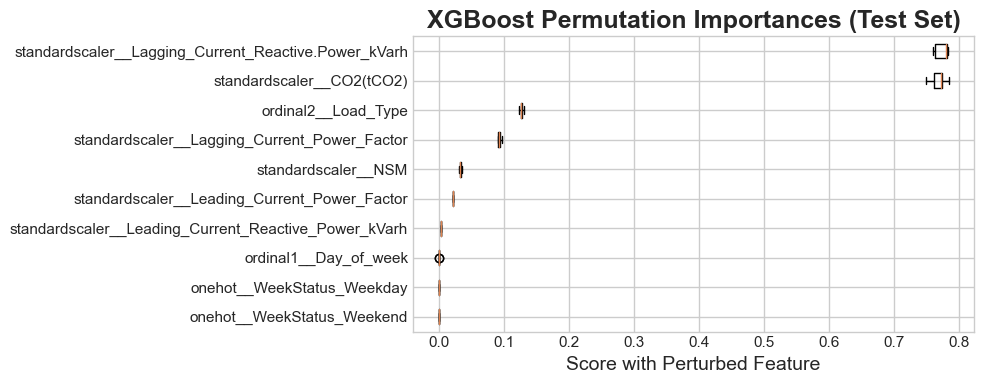

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

result=permutation_importance(XGB_best, df_test, y_test, scoring='r2', n_repeats=5, random_state=111)


test_score = XGB_best.score(df_test,y_test)

sorted_indcs = np.argsort(result.importances_mean)

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))

plt.boxplot(result.importances[sorted_indcs].T, labels=df_test.columns[sorted_indcs], vert=False)

plt.title("XGBoost Permutation Importances (Test Set)", fontsize=18, fontweight='bold')
plt.xlabel('Score with Perturbed Feature', fontsize=14)
plt.tight_layout()
plt.show()

                                                       score
standardscaler__CO2(tCO2)                             3026.0
onehot__WeekStatus_Weekday                           16845.0
ordinal2__Load_Type                                  17330.0
standardscaler__Leading_Current_Power_Factor         39711.0
standardscaler__Leading_Current_Reactive_Power_...   50933.0
standardscaler__NSM                                  64067.0
ordinal1__Day_of_week                                70632.0
standardscaler__Lagging_Current_Power_Factor        103717.0
standardscaler__Lagging_Current_Reactive.Power_...  125011.0
                                                         score
onehot__WeekStatus_Weekday                            307018.0
ordinal1__Day_of_week                                 845192.0
ordinal2__Load_Type                                  1136091.0
standardscaler__NSM                                  2485441.0
standardscaler__Leading_Current_Reactive_Power_...   3062186.0
standardscal

<Figure size 1500x1000 with 0 Axes>

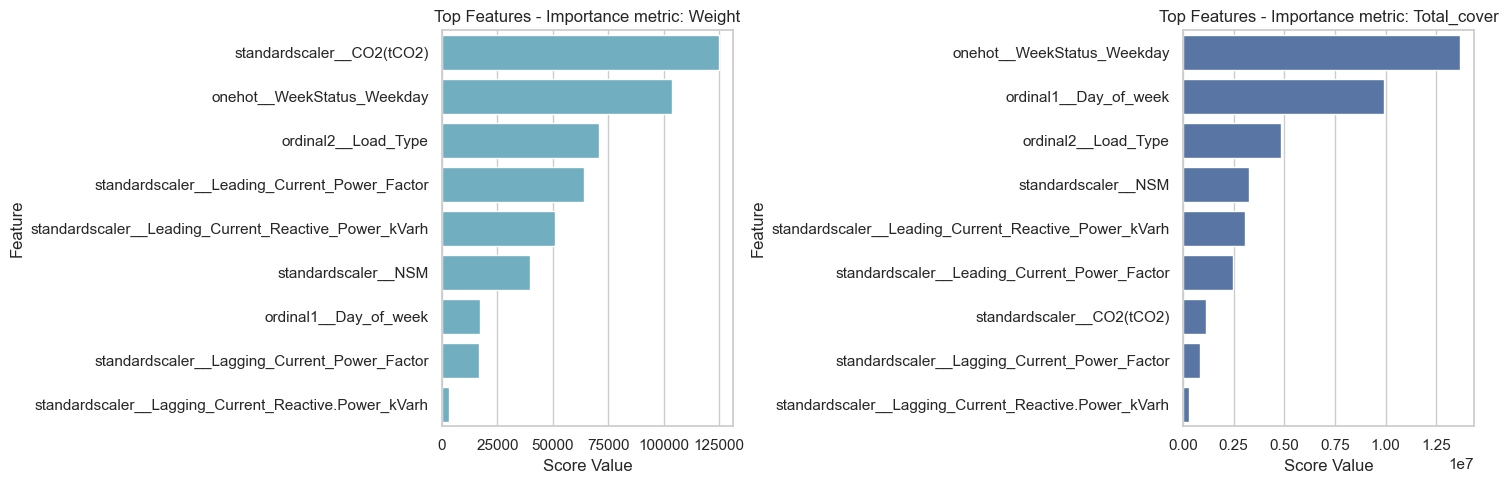

In [257]:

import numpy as np

importance_metrics=['weight','total_cover']

sns.set(style="whitegrid")
color_mapping = {'weight': 'c', 'total_cover': 'b'}

plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(nrows=1, ncols=len(importance_metrics), figsize=(15, 5))


new_column_names = {'f0':'WeekStatus', 'f2': 'Day_of_week', 'f3': 'Load_Type', 'f4': 'Lagging_Current_Reactive.Power_kVarh', 'f5':'Leading_Current_Reactive_Power_kVarh', 'f6':'CO2(tCO2)','f7':'Lagging_Current_Power_Factor', 'f8': 'Leading_Current_Power_Factor', 'f9':'NSM'}
for i, metric in enumerate(importance_metrics):
    scores = XGB_best.get_booster().get_score(importance_type=metric)
    scores_keys = scores.keys()
    scores_value = pd.DataFrame(list(scores.values()),index=scores_keys,columns=['score']).sort_values(by='score',ascending=True)
    scores_value = scores_value.rename(index=new_column_names)
    print(scores_value)

    plt.subplot(1, len(importance_metrics), i + 1)
    sns.barplot(x=scores_value['score'][::-1], y=scores_value.index, color=color_mapping[metric])
    plt.title(f'Top Features - Importance metric: {metric.capitalize()}')
    plt.xlabel('Score Value')
    plt.ylabel('Feature')
plt.tight_layout()
plt.show()


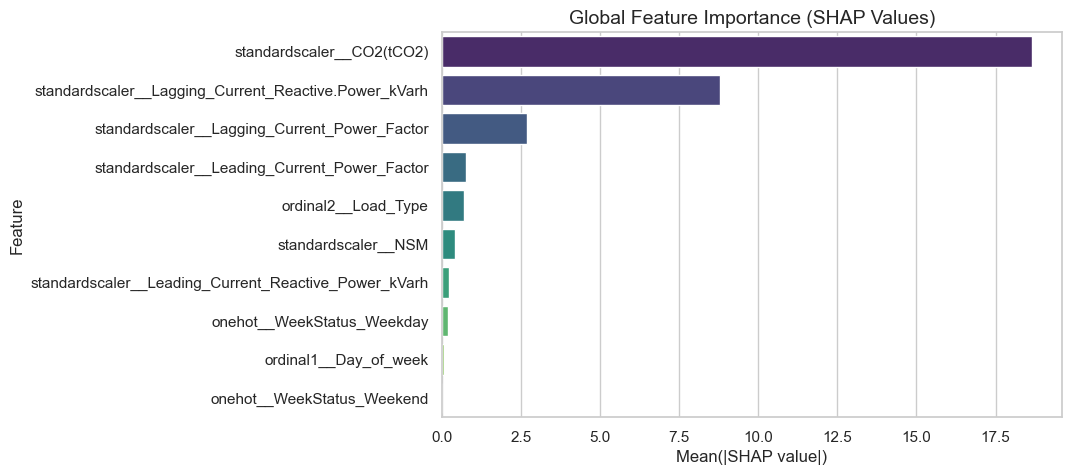

In [258]:
import shap
shap.initjs() 
explainer = shap.TreeExplainer(XGB_best)
shap_values = explainer.shap_values(df_test[:1000])

shap_summary = np.mean(np.abs(shap_values), axis=0)
indcs = np.argsort(shap_summary)[::-1]

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=shap_summary[indcs], y=feature_names[indcs], palette="viridis")
plt.xlabel('Mean(|SHAP value|)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Global Feature Importance (SHAP Values)', fontsize=14)

plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


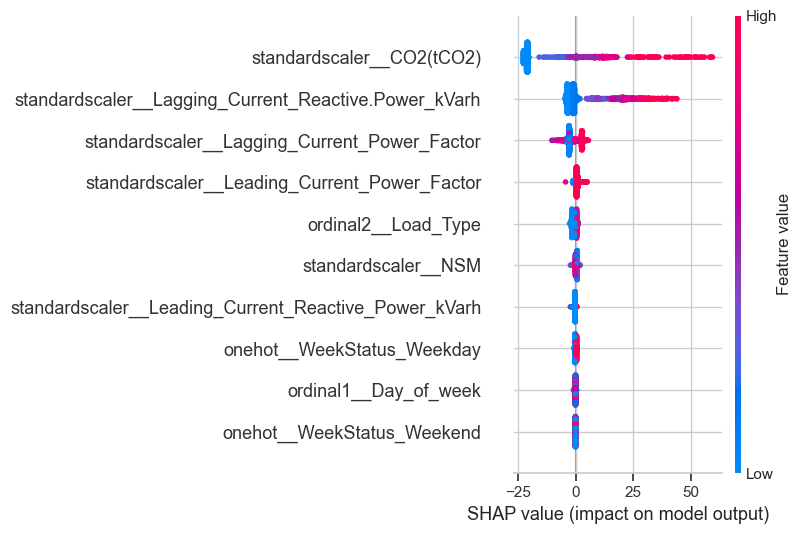

In [259]:

shap.summary_plot(shap_values,df_test[:1000],feature_names=feature_names)


In [260]:
feature_importances=XGB_best.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': df_test.columns, 'Importance': feature_importances})
feature_importance_df 

,Feature,Importance
0,onehot__WeekStatus_Weekday,0.000021
1,onehot__WeekStatus_Weekend,0.000000
2,ordinal1__Day_of_week,0.000002
3,ordinal2__Load_Type,0.000023
4,standardscaler__Lagging_Current_Reactive.Power...,0.000331
5,standardscaler__Leading_Current_Reactive_Power...,0.000018
6,standardscaler__CO2(tCO2),0.999367
7,standardscaler__Lagging_Current_Power_Factor,0.000115
8,standardscaler__Leading_Current_Power_Factor,0.000091
9,standardscaler__NSM,0.000033


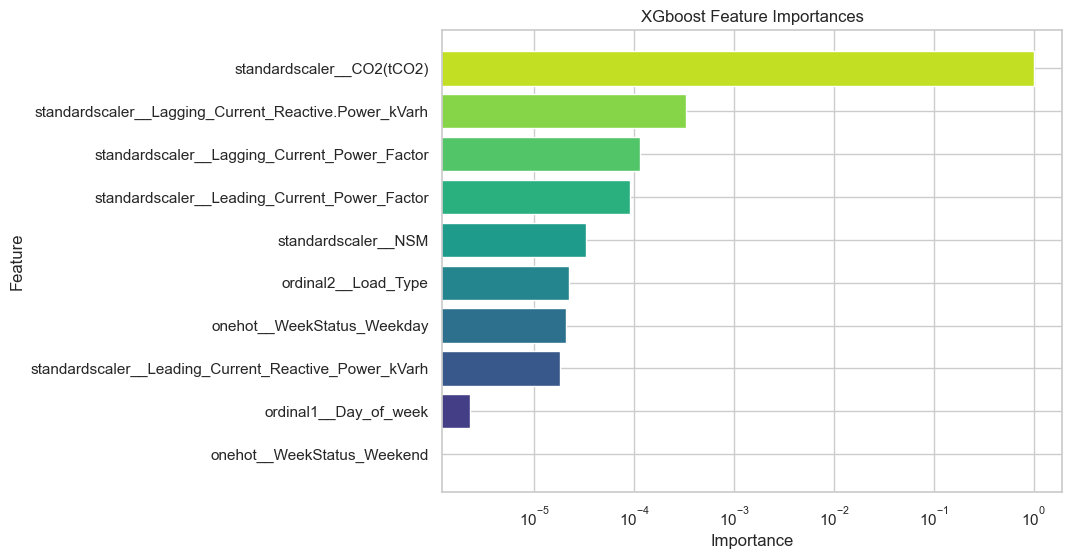

In [261]:

sorted_df = feature_importance_df.sort_values(by='Importance')

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.barh(sorted_df['Feature'], sorted_df['Importance'], color=sns.color_palette("viridis", n_colors=len(sorted_df)))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGboost Feature Importances')
plt.semilogx()
plt.show()

In [262]:
index = 100  # the index of the point to explain
print(explainer.expected_value)  # average prediction value
shap.force_plot(explainer.expected_value, shap_values[index, :], features=df_test.iloc[index, :], feature_names=feature_names)

27.910751


In [263]:
index = 50  # the index of the point to explain
print(explainer.expected_value)  # average prediction value
shap.force_plot(explainer.expected_value, shap_values[index, :], features=df_test.iloc[index, :], feature_names=feature_names)

27.910751


In [264]:
index = 899  # the index of the point to explain
print(explainer.expected_value)  # average prediction value
shap.force_plot(explainer.expected_value, shap_values[index, :], features=df_test.iloc[index, :], feature_names=feature_names)

27.910751


..